In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn streamlit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
print("Executed")

Executed


In [3]:
file_path = r"C:\Users\dhara\OneDrive\Desktop\AICTE Internship\fitness_tracker_dataset.csv"
df = pd.read_csv(file_path)
print("Ëxecute")

Ëxecute


In [4]:
# Check for missing values
print(df.isnull().sum())

# Show dataset info
df.info()

# Summary statistics
df.describe()


User_ID              0
Age                  0
Gender               0
Height_cm            0
Weight_kg            0
Daily_Steps          0
Calories_Burned      0
Heart_Rate           0
Sleep_Duration       0
Workout_Type        19
Hydration_Liters     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           100 non-null    int64  
 1   Age               100 non-null    int64  
 2   Gender            100 non-null    object 
 3   Height_cm         100 non-null    int64  
 4   Weight_kg         100 non-null    int64  
 5   Daily_Steps       100 non-null    int64  
 6   Calories_Burned   100 non-null    int64  
 7   Heart_Rate        100 non-null    int64  
 8   Sleep_Duration    100 non-null    float64
 9   Workout_Type      81 non-null     object 
 10  Hydration_Liters  100 non-null    float64
dtypes: float64(2),

,User_ID,Age,Height_cm,Weight_kg,Daily_Steps,Calories_Burned,Heart_Rate,Sleep_Duration,Hydration_Liters
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.00000,100.000000
mean,50.500000,37.910000,173.970000,77.320000,11128.800000,2542.740000,89.9000,6.91900,3.153000
std,29.011492,12.219454,15.079222,13.535498,4974.098357,576.465031,17.8113,1.79425,1.120286
min,1.000000,18.000000,150.000000,51.000000,2784.000000,1511.000000,60.0000,4.10000,1.000000
25%,25.750000,26.750000,160.750000,69.000000,6984.000000,2113.000000,74.5000,5.47500,2.375000
50%,50.500000,38.000000,174.500000,79.000000,10513.500000,2531.500000,90.0000,6.80000,3.250000
75%,75.250000,46.250000,186.000000,87.000000,15322.750000,3053.750000,104.0000,8.50000,4.025000
max,100.000000,59.000000,199.000000,99.000000,19532.000000,3445.000000,119.0000,10.00000,5.000000


In [5]:
print(df.dtypes)


User_ID               int64
Age                   int64
Gender               object
Height_cm             int64
Weight_kg             int64
Daily_Steps           int64
Calories_Burned       int64
Heart_Rate            int64
Sleep_Duration      float64
Workout_Type         object
Hydration_Liters    float64
dtype: object


In [6]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['Gender']  # Replace with actual categorical columns

# Convert categorical columns to numeric
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])  


In [7]:
print(df.dtypes)


User_ID               int64
Age                   int64
Gender                int64
Height_cm             int64
Weight_kg             int64
Daily_Steps           int64
Calories_Burned       int64
Heart_Rate            int64
Sleep_Duration      float64
Workout_Type         object
Hydration_Liters    float64
dtype: object


In [8]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Select text columns

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("Categorical columns converted to numeric:", categorical_cols)


Categorical columns converted to numeric: Index(['Workout_Type'], dtype='object')


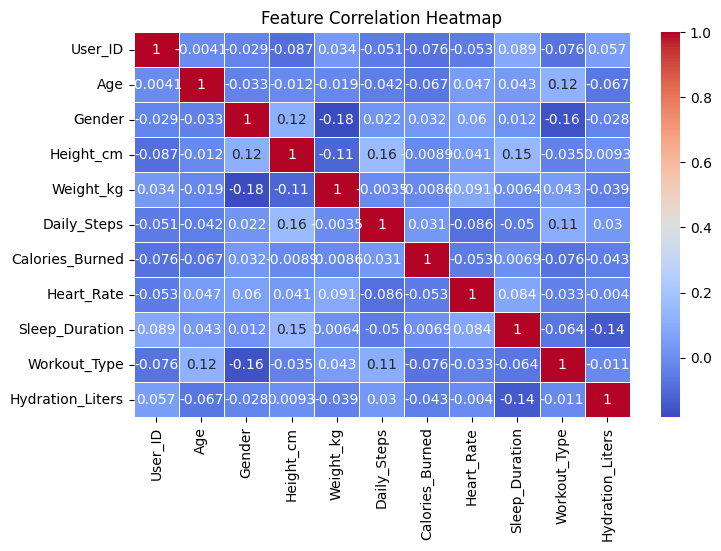

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
df.columns = df.columns.str.strip()  # Removes extra spaces


In [11]:
print(df.columns)  # Display all column names


Index(['User_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Daily_Steps',
       'Calories_Burned', 'Heart_Rate', 'Sleep_Duration', 'Workout_Type',
       'Hydration_Liters'],
      dtype='object')


In [12]:
df.rename(columns={'Daily_Steps ': 'Daily_Steps'}, inplace=True)


In [13]:
X = df[['Age', 'Weight_kg', 'Height_cm', 'Daily_Steps']]
y = df['Calories_Burned']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 549.6925
